In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import os
import json
from matplotlib.cm import ScalarMappable
from matplotlib.pyplot import cm
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set()

In [16]:
path = "C:/Users/18565/Desktop/Classes/VA/Project/Code/VA-Project/"

In [17]:
df = pd.read_csv(os.path.join(path,"data/data with added gate category for tableau.csv"),index_col=0)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index("Timestamp",inplace=True)

In [18]:
df.head()

car-id car-type      gate-name gate_category
Timestamp                                                                    
2015-05-01 00:43:28  20154301124328-262        4      entrance3      entrance
2015-05-01 01:03:48  20154301124328-262        4  general-gate1  general-gate
2015-05-01 01:06:24  20154301124328-262        4   ranger-stop2   ranger-stop
2015-05-01 01:09:25  20154301124328-262        4   ranger-stop0   ranger-stop
2015-05-01 01:12:36  20154301124328-262        4  general-gate2  general-gate

# Plot Std Mean of total traffic flux 

## At Each Gate

In [19]:
dummy = pd.get_dummies(df['gate-name'],dtype=int)
numerical_data = pd.concat((df,dummy),axis=1)
summary = numerical_data.describe()

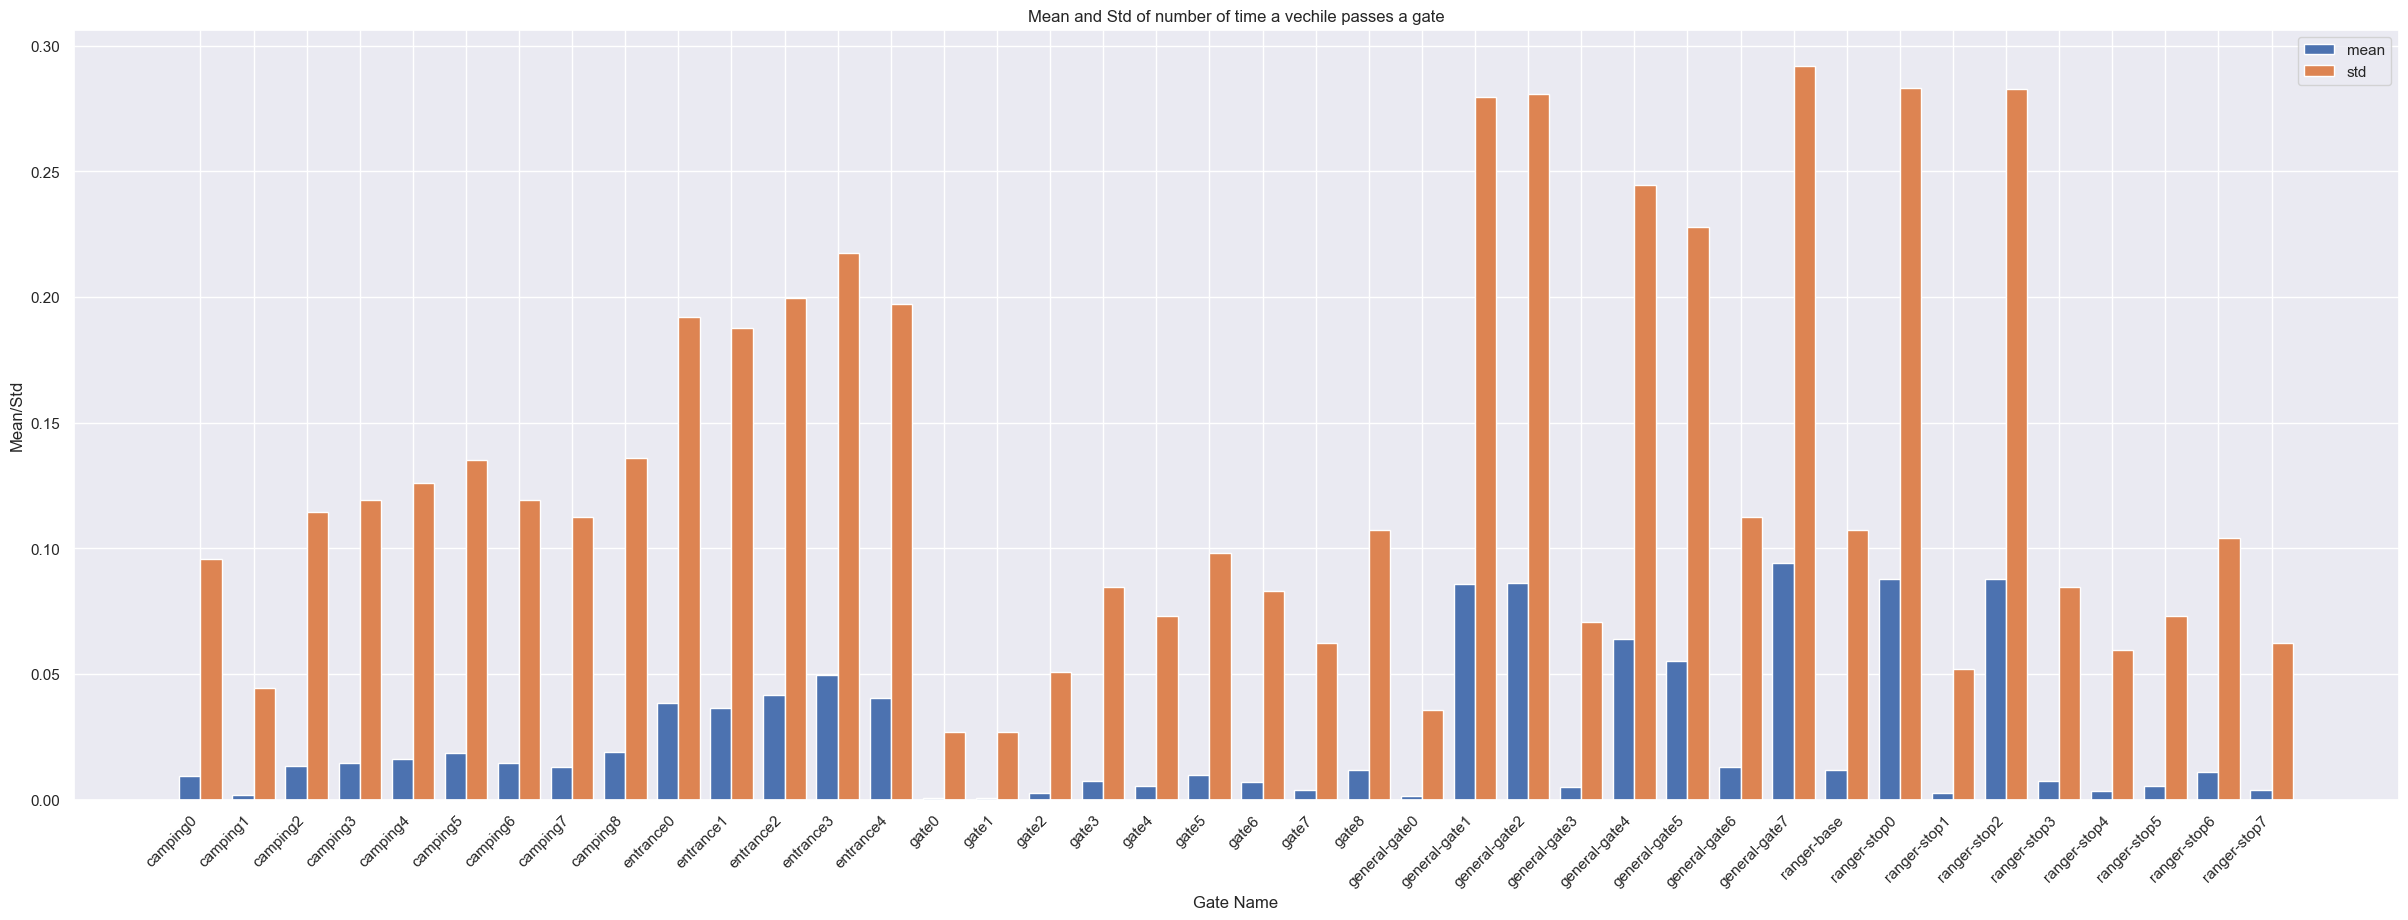

In [21]:
X = summary.columns
mean = list(summary.loc['mean'])
std = list(summary.loc['std'])
  
X_axis = np.arange(len(X)) 
fig = plt.figure(figsize=(30,10))
plt.bar(X_axis - 0.2, mean, 0.4, label = 'mean') 
plt.bar(X_axis + 0.2, std, 0.4, label = 'std') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Gate Name") 
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean/Std") 
plt.title("Mean and Std of number of time a vechile passes a gate") 
plt.legend() 
plt.show() 

In [24]:
dummy = pd.get_dummies(df['gate_category'],dtype=int)
numerical_data = pd.concat((df,dummy),axis=1)
summary = numerical_data.describe()

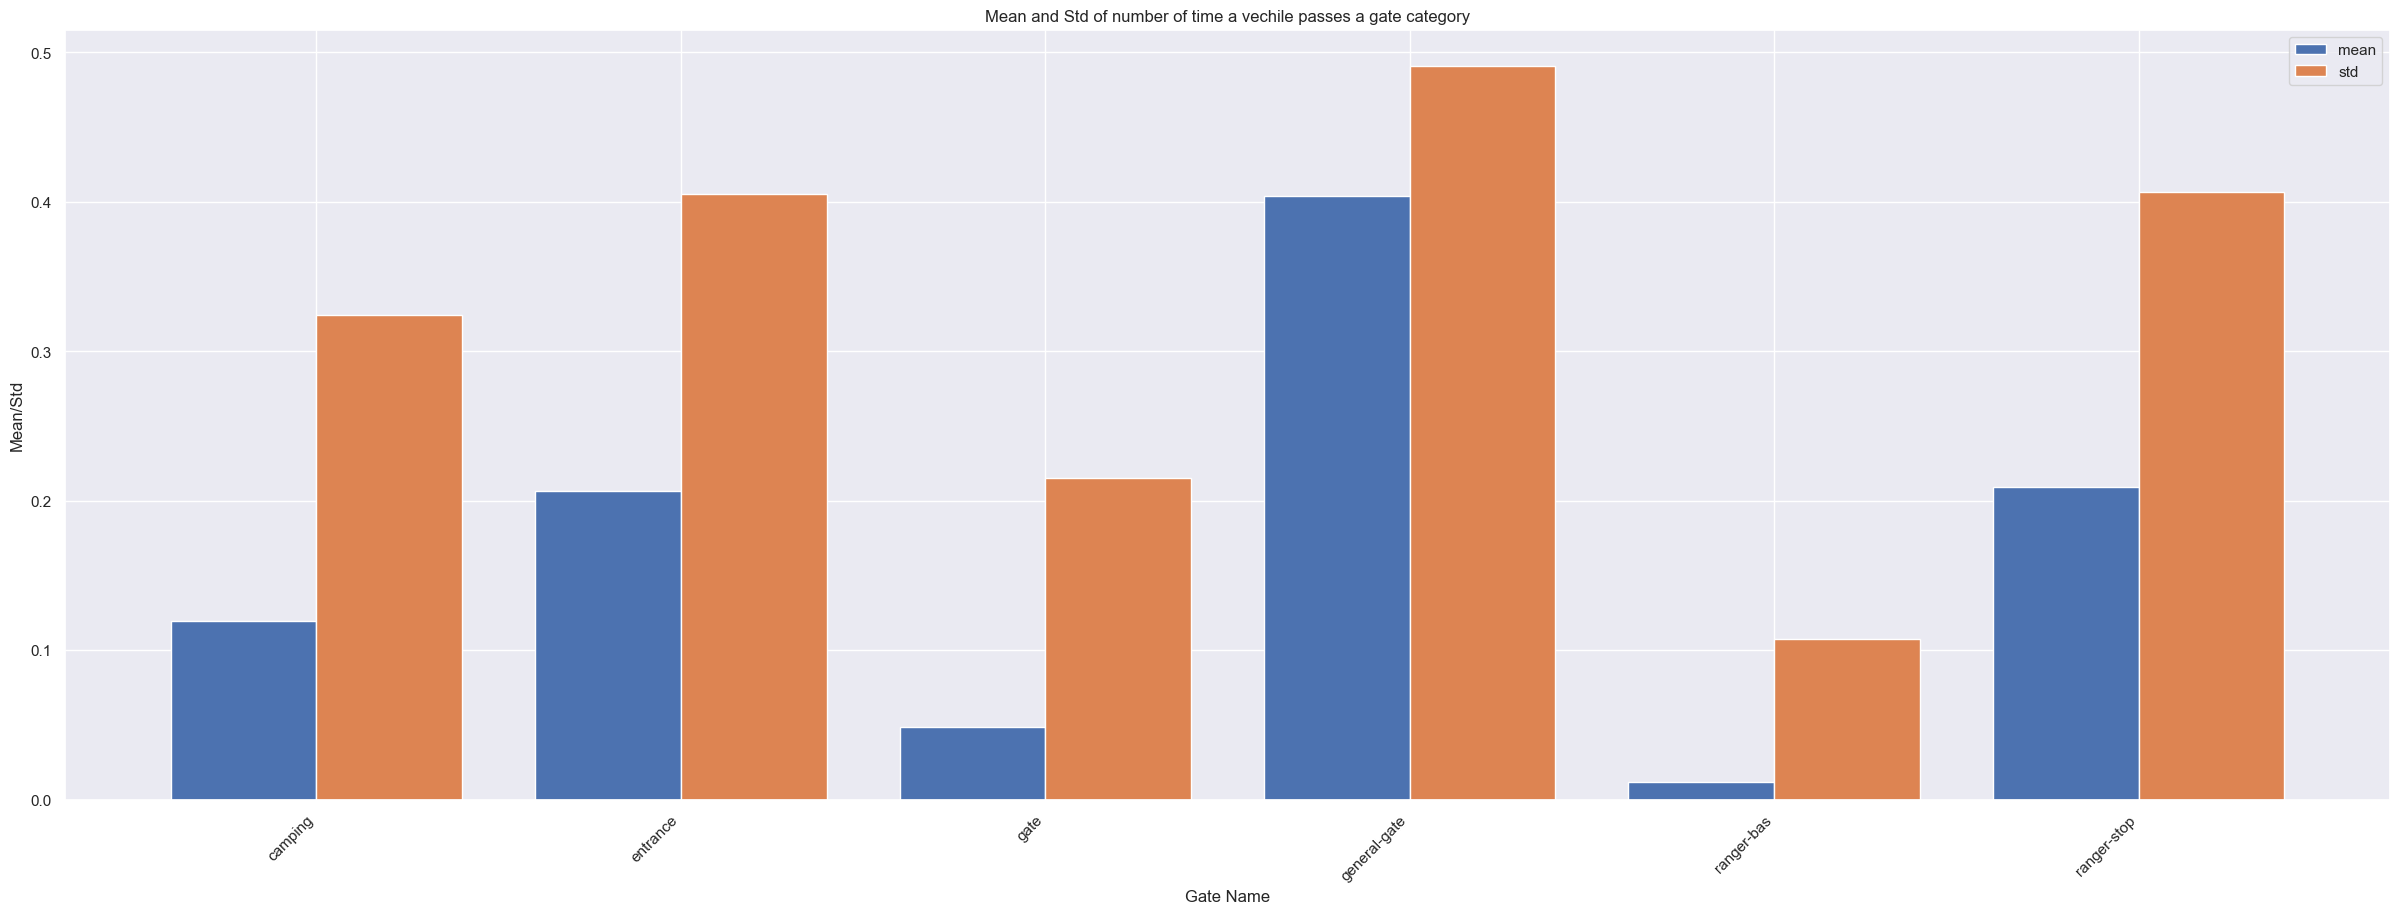

In [25]:
X = summary.columns
mean = list(summary.loc['mean'])
std = list(summary.loc['std'])
  
X_axis = np.arange(len(X)) 
fig = plt.figure(figsize=(30,10))
plt.bar(X_axis - 0.2, mean, 0.4, label = 'mean') 
plt.bar(X_axis + 0.2, std, 0.4, label = 'std') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Gate Name") 
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean/Std") 
plt.title("Mean and Std of number of time a vechile passes a gate category") 
plt.legend() 
plt.show() 

## For Each Car

In [26]:
dummy = pd.get_dummies(df['car-type'],dtype=int)
numerical_data = pd.concat((df,dummy),axis=1)
summary = numerical_data.describe()

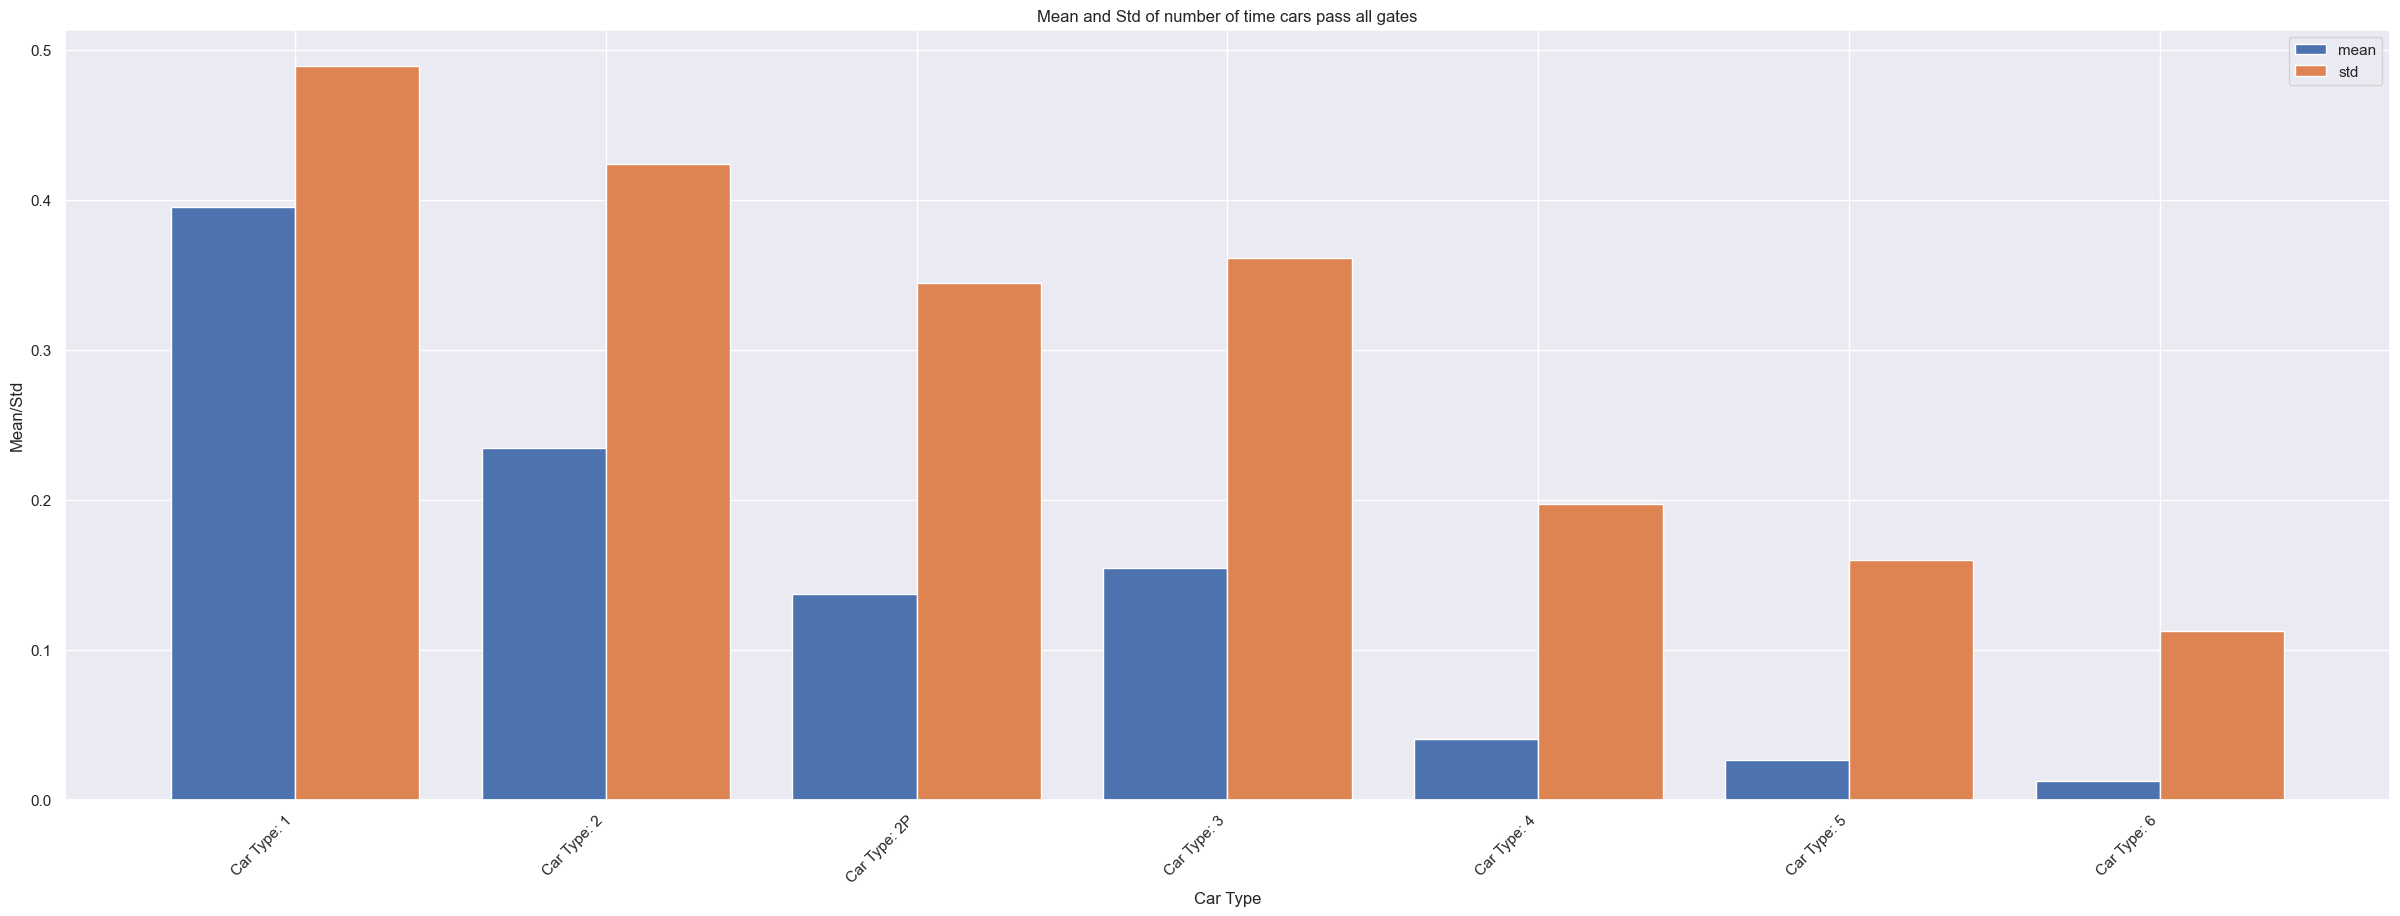

In [27]:
X = ["Car Type: "+i for i in summary.columns]
mean = list(summary.loc['mean'])
std = list(summary.loc['std'])
  
X_axis = np.arange(len(X)) 
fig = plt.figure(figsize=(30,10))
plt.bar(X_axis - 0.2, mean, 0.4, label = 'mean') 
plt.bar(X_axis + 0.2, std, 0.4, label = 'std') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Car Type") 
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean/Std") 
plt.title("Mean and Std of number of time cars pass all gates") 
plt.legend() 
plt.show() 

# Distribution plots

In [28]:
df['count'] = np.ones(len(df))

## For Car Types

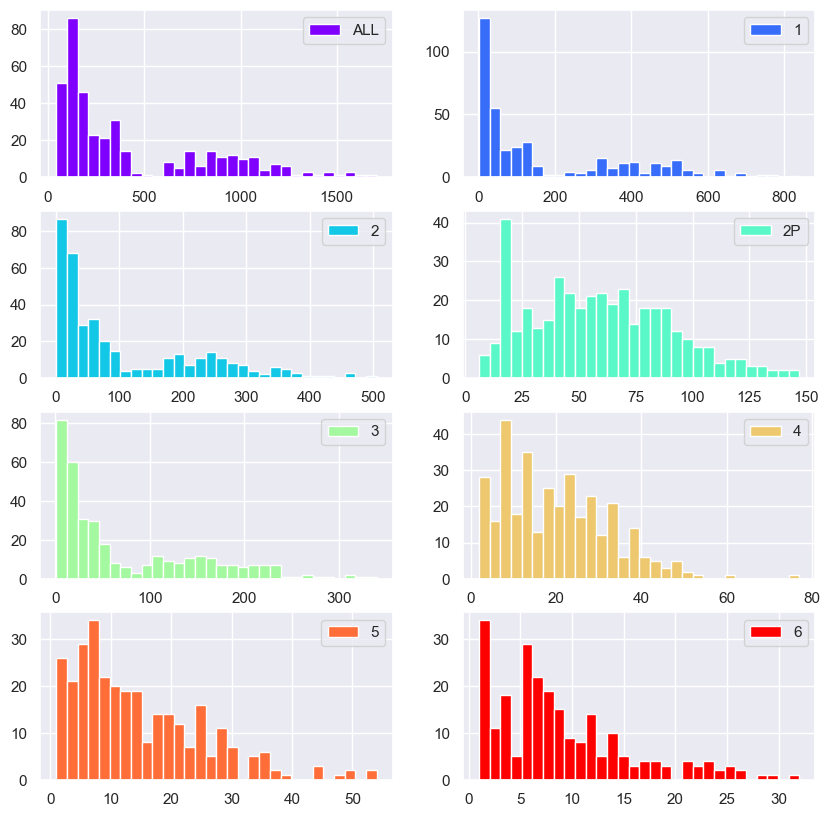

In [36]:
fig,axs = plt.subplots(4,2,figsize=(10,10))
axes = axs.flat
colors = cm.rainbow(np.linspace(0, 1, 8))
cartypes = ["ALL"]+ list(np.unique(df['car-type']))
by_date = df.groupby([df.index.date])[['count']].sum()
axes[0].hist(by_date,bins=30,label=cartypes[0],color = colors[0])
axes[0].legend()
for ax, cartype,color in zip(axes[1:],cartypes[1:],colors[1:]):
    by_date = df[df['car-type']==cartype].groupby([df[df['car-type']==cartype].index.date])[['count']].sum()
    ax.hist(by_date,bins=30,label=cartype,color=color)
    ax.legend()
plt.show()

## At Each Gate Type

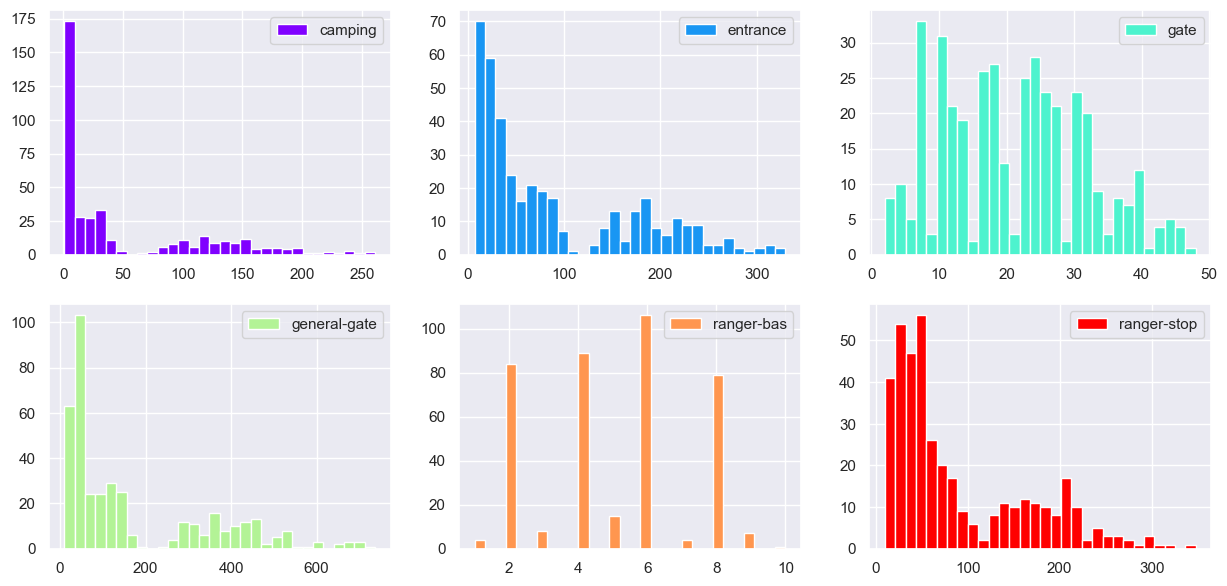

In [205]:
fig,axs = plt.subplots(2,3,figsize=(15,7))
axes = axs.flat
colors = cm.rainbow(np.linspace(0, 1, 6))
gatetypes = np.unique(df['gate_category'])
for ax, gatetype,color in zip(axes,gatetypes,colors):
    by_date = df[df['gate_category']==gatetype].groupby([df[df['gate_category']==gatetype].index.date])[['count']].sum()
    ax.hist(by_date,bins=30,label=gatetype,color=color)
    ax.legend()
plt.show()

# Box Plots

## For Each Car

In [349]:

cartypes = ['1', '2', '3','4', '5', '6']
data = []
car_type = []
for cartype in cartypes:
    by_date = df[df['car-type']==cartype].groupby([df[df['car-type']==cartype].index.date])[['count']].sum()
    # print(len(by_date['count']))
    data.append(by_date['count'])
    car_type.append("Car Type :"+cartype)

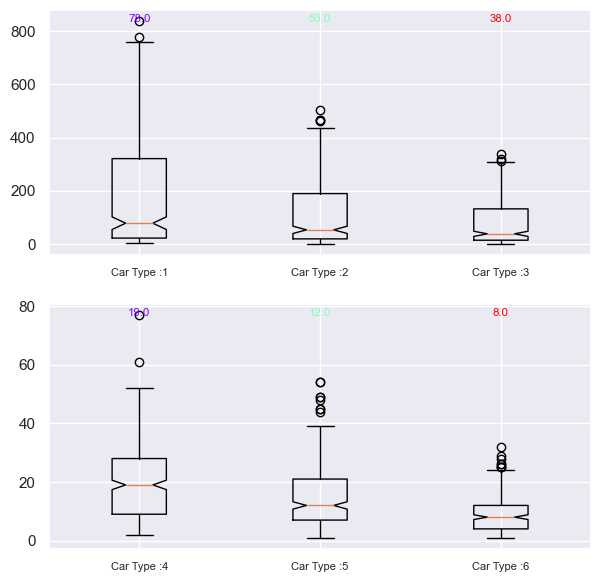

In [350]:
fig,aex = plt.subplots(2,1,figsize=(7,7))

axes = aex.flat
end =3
outlier_ = []
data_medians = []
for ax in axes:
    bp = ax.boxplot(data[end-3:end],notch=True,vert=True, whis=1.5)
    ax.set_xticklabels(car_type[end-3:end], fontsize=8)
    medians =  [i.get_ydata()[1] for i in bp['medians']]
    data_medians +=medians
    colors = cm.rainbow(np.linspace(0, 1, 3))
    pos = np.arange(3) + 1
    for tick, label in zip(range(3), ax.get_xticklabels()):
        ax.text(pos[tick], .95, medians[tick],
                transform=ax.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',color=colors[tick])
    for i in range(0,len(bp['whiskers']),2):
        outlier_.append((bp['whiskers'][i].get_ydata()[1],bp['whiskers'][i+1].get_ydata()[1]))
    end+=3
plt.show() 

In [351]:
outlier_points = []
for X,cartype,outlier in zip(data,cartypes,outlier_):
    outlier_points.append((cartype,X[(X<outlier[0])| (X>outlier[1])]))

In [353]:
outlier_points

[('1',
  2015-07-11    839.0
  2015-07-17    780.0
  Name: count, dtype: float64),
 ('2',
  2015-07-04    461.0
  2015-07-10    505.0
  2015-07-11    468.0
  2015-07-31    467.0
  Name: count, dtype: float64),
 ('3',
  2015-07-05    312.0
  2015-07-12    340.0
  2015-07-17    321.0
  Name: count, dtype: float64),
 ('4',
  2015-07-14    77.0
  2015-08-19    61.0
  Name: count, dtype: float64),
 ('5',
  2015-06-16    49.0
  2015-07-05    45.0
  2015-07-11    54.0
  2015-07-14    44.0
  2015-07-19    49.0
  2015-08-03    45.0
  2016-05-09    48.0
  2016-05-31    54.0
  Name: count, dtype: float64),
 ('6',
  2015-06-25    25.0
  2015-07-24    28.0
  2015-07-30    26.0
  2015-08-21    29.0
  2015-09-11    32.0
  2015-09-25    25.0
  2015-10-26    26.0
  2016-05-12    25.0
  Name: count, dtype: float64)]

In [352]:
means = [i.mean() for i in data]
std = [i.std() for i in data]

## For Each Gate

In [345]:

gatetypes = ['entrance',  'general-gate','camping','ranger-stop', 'ranger-bas','gate']
data = []

pos = np.arange(6) + 1
for gatetype in gatetypes:
    by_date = df[df['gate_category']==gatetype].groupby([df[df['gate_category']==gatetype].index.date])[['count']].sum()
    # print(len(by_date['count']))
    data.append(by_date['count'])
    

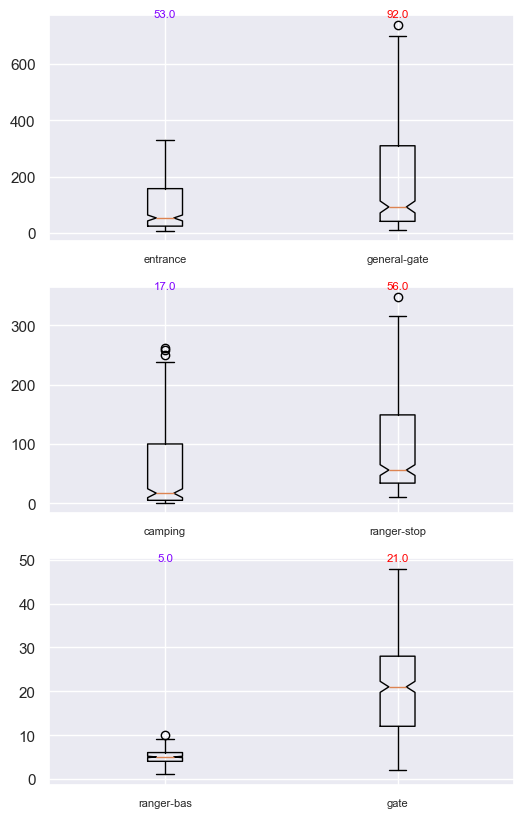

In [346]:
fig,axs = plt.subplots(3,1,figsize=(6,10))

axes = axs.flat
end = 2
outlier_ = []
data_medians = []
for ax in axes:
    bp = ax.boxplot(data[end-2:end],notch=True,vert=True, whis=1.5)
    ax.set_xticklabels(gatetypes[end-2:end], fontsize=8)
    medians =  [i.get_ydata()[1] for i in bp['medians']]
    data_medians += medians
    pos = np.arange(2) + 1
    colors = cm.rainbow(np.linspace(0, 1, 2))
    for tick, label in zip(range(2), ax.get_xticklabels()):
        ax.text(pos[tick], 0.99, medians[tick],
                transform=ax.get_xaxis_transform(),
                horizontalalignment='center', size='x-small',color=colors[tick])
    for i in range(0,len(bp['whiskers']),2):
        outlier_.append((bp['whiskers'][i].get_ydata()[1],bp['whiskers'][i+1].get_ydata()[1]))
    end +=2
    
plt.show() 

In [347]:
outlier_points = []
for X,gatetype,outlier in zip(data,gatetypes,outlier_):
    outlier_points.append((gatetype,X[(X<outlier[0])| (X>outlier[1])]))

In [348]:
outlier_points

[('entrance', Series([], Name: count, dtype: float64)),
 ('general-gate',
  2015-07-11    737.0
  Name: count, dtype: float64),
 ('camping',
  2015-07-05    261.0
  2015-07-11    250.0
  2015-07-17    258.0
  Name: count, dtype: float64),
 ('ranger-stop',
  2015-07-11    348.0
  Name: count, dtype: float64),
 ('ranger-bas',
  2016-05-20    10.0
  Name: count, dtype: float64),
 ('gate', Series([], Name: count, dtype: float64))]

# ETS Decomposition

## For Car Type

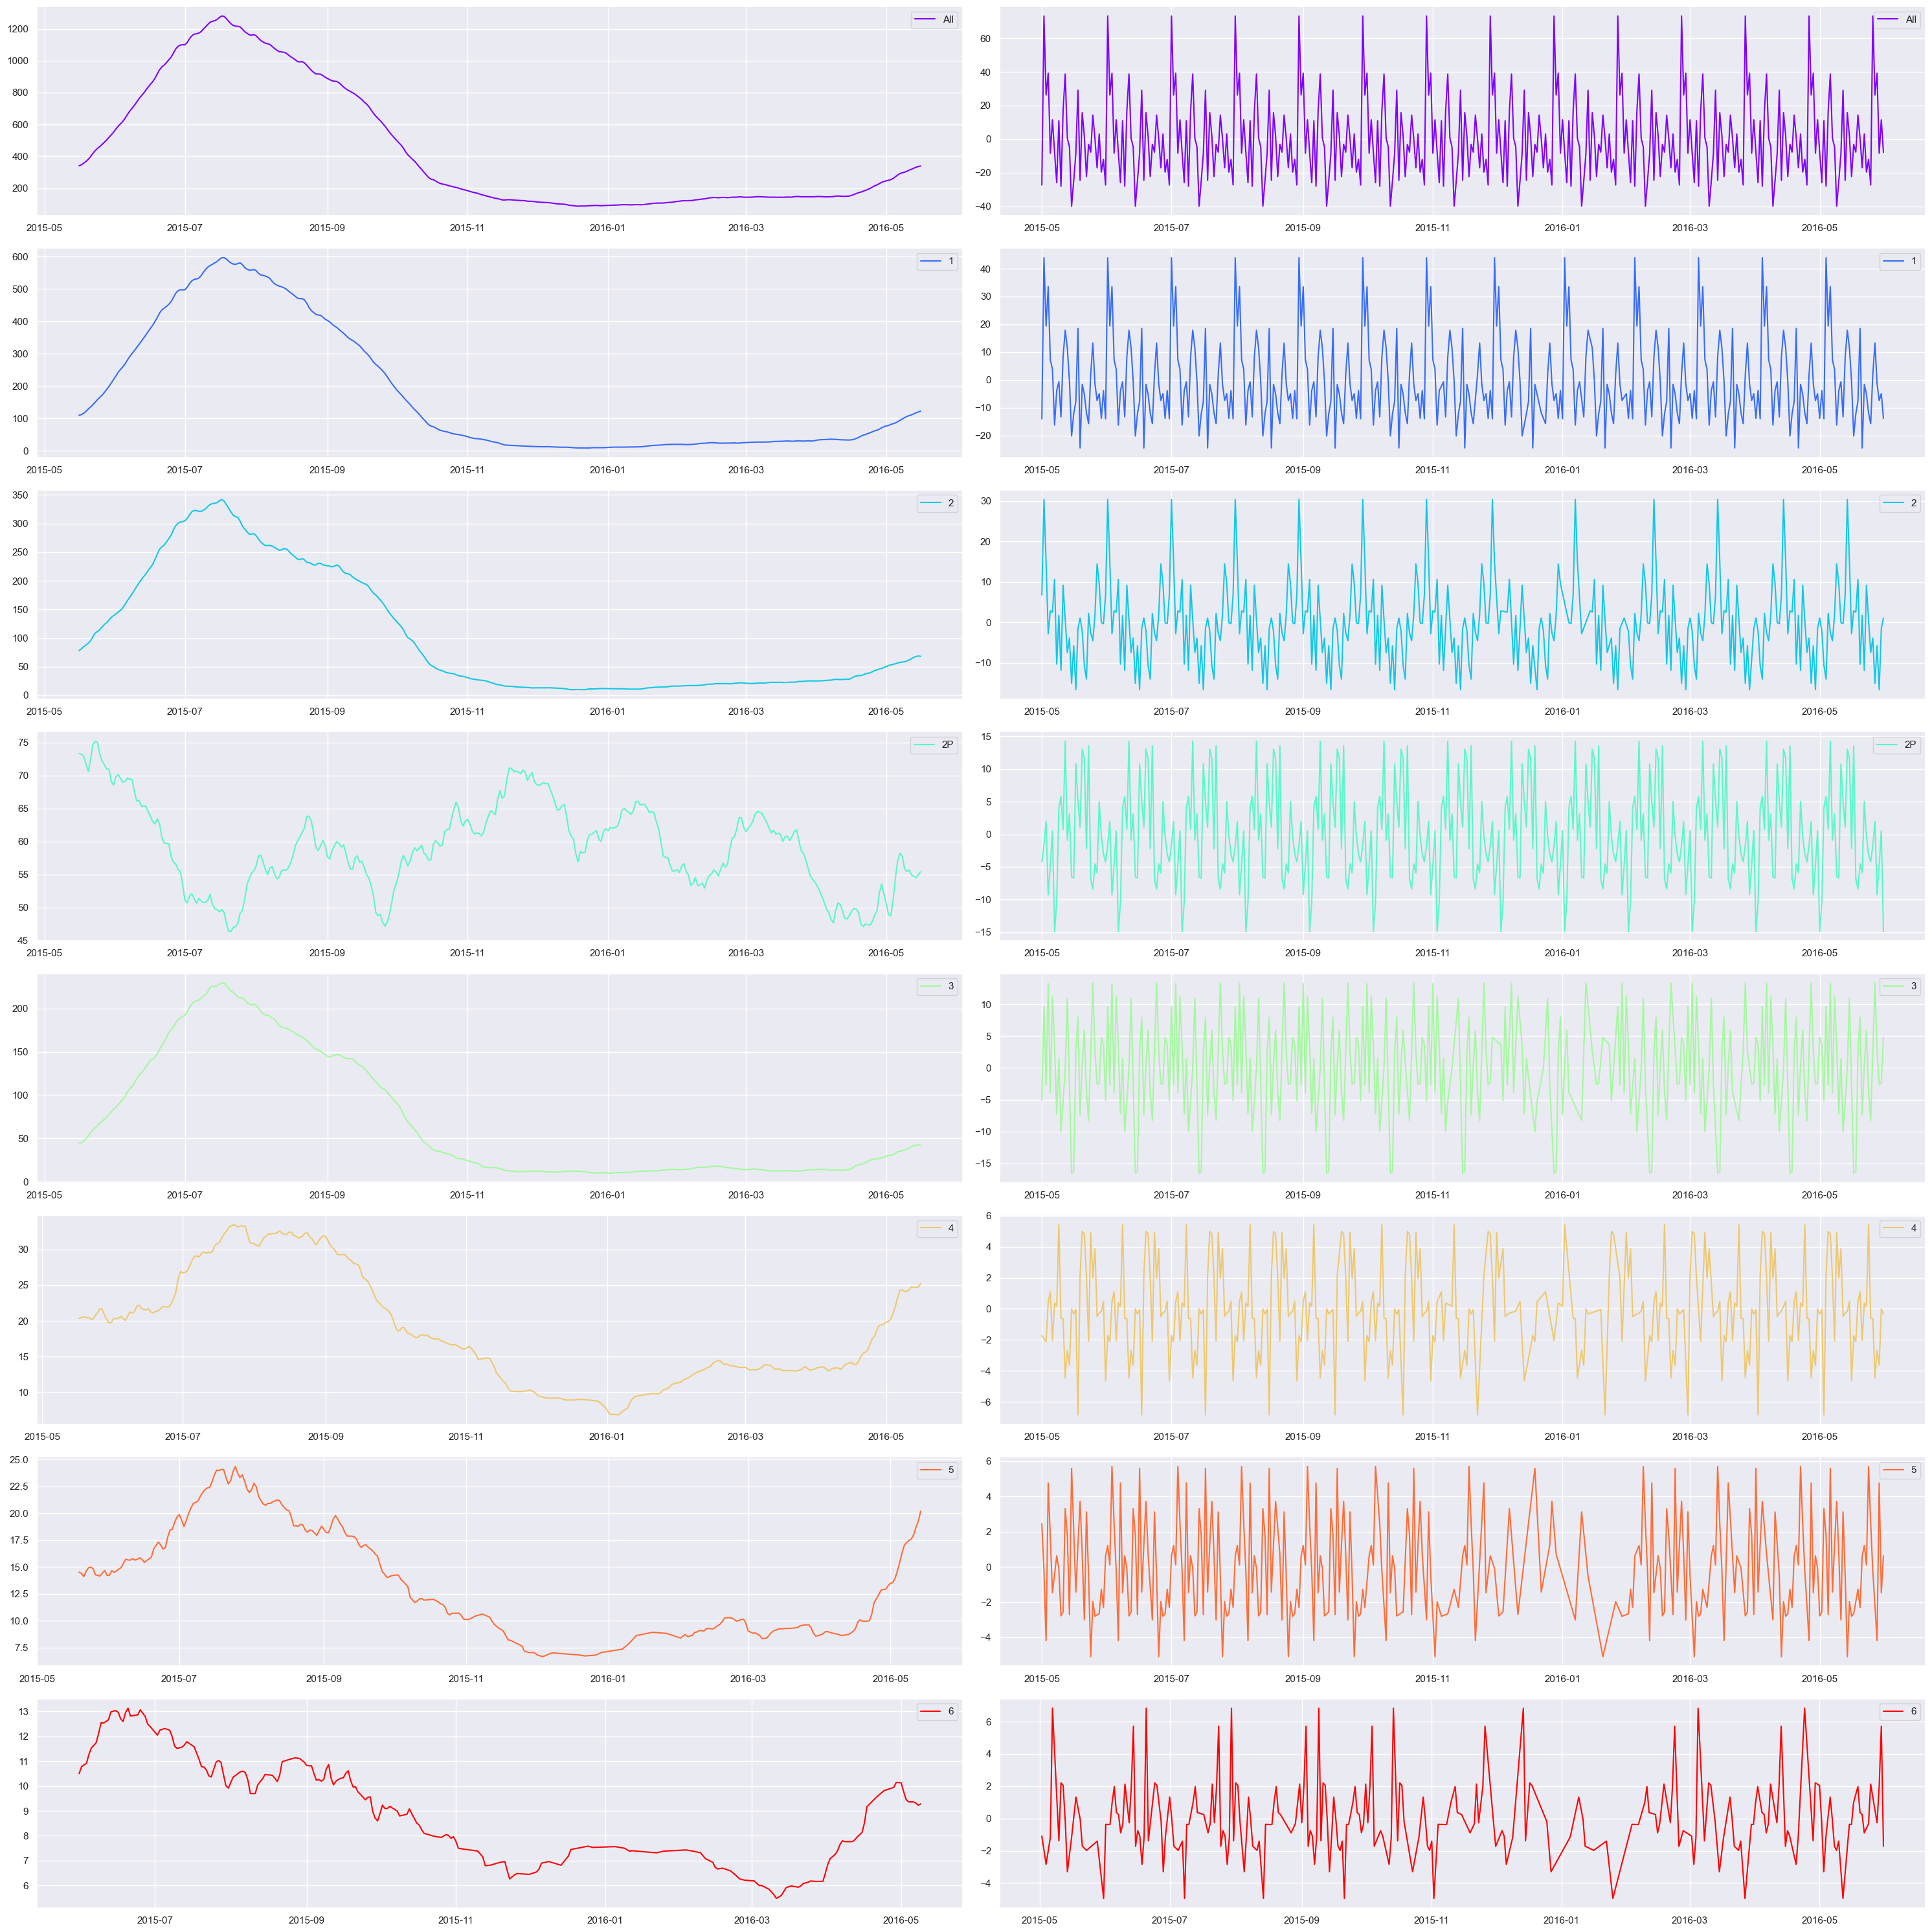

In [55]:
fig,axes = plt.subplots(8,2,figsize=(30,30))
colors = cm.rainbow(np.linspace(0, 1, 8))
by_date = df.groupby([df.index.date])[['count']].sum()
result = seasonal_decompose(by_date["count"], model='additive',period=30)

axes[0][0].plot(result.trend,label="All",color=colors[0])
axes[0][1].plot(result.seasonal,label="All", color= colors[0])
axes[0][0].legend()
axes[0][1].legend()

cartypes = np.unique(df['car-type'])
for ax, cartype,color in zip(axes[1:],cartypes,colors[1:]):
    by_date = df[df['car-type']==cartype].groupby([df[df['car-type']==cartype].index.date])[['count']].sum()
    result = seasonal_decompose(by_date["count"], model='additive',period=30)
    ax[0].plot(result.trend,label=cartype,color=color)
    ax[1].plot(result.seasonal,label=cartype,color=color)
    ax[0].legend()
    ax[1].legend()
fig.tight_layout()
plt.show()

## For gate types

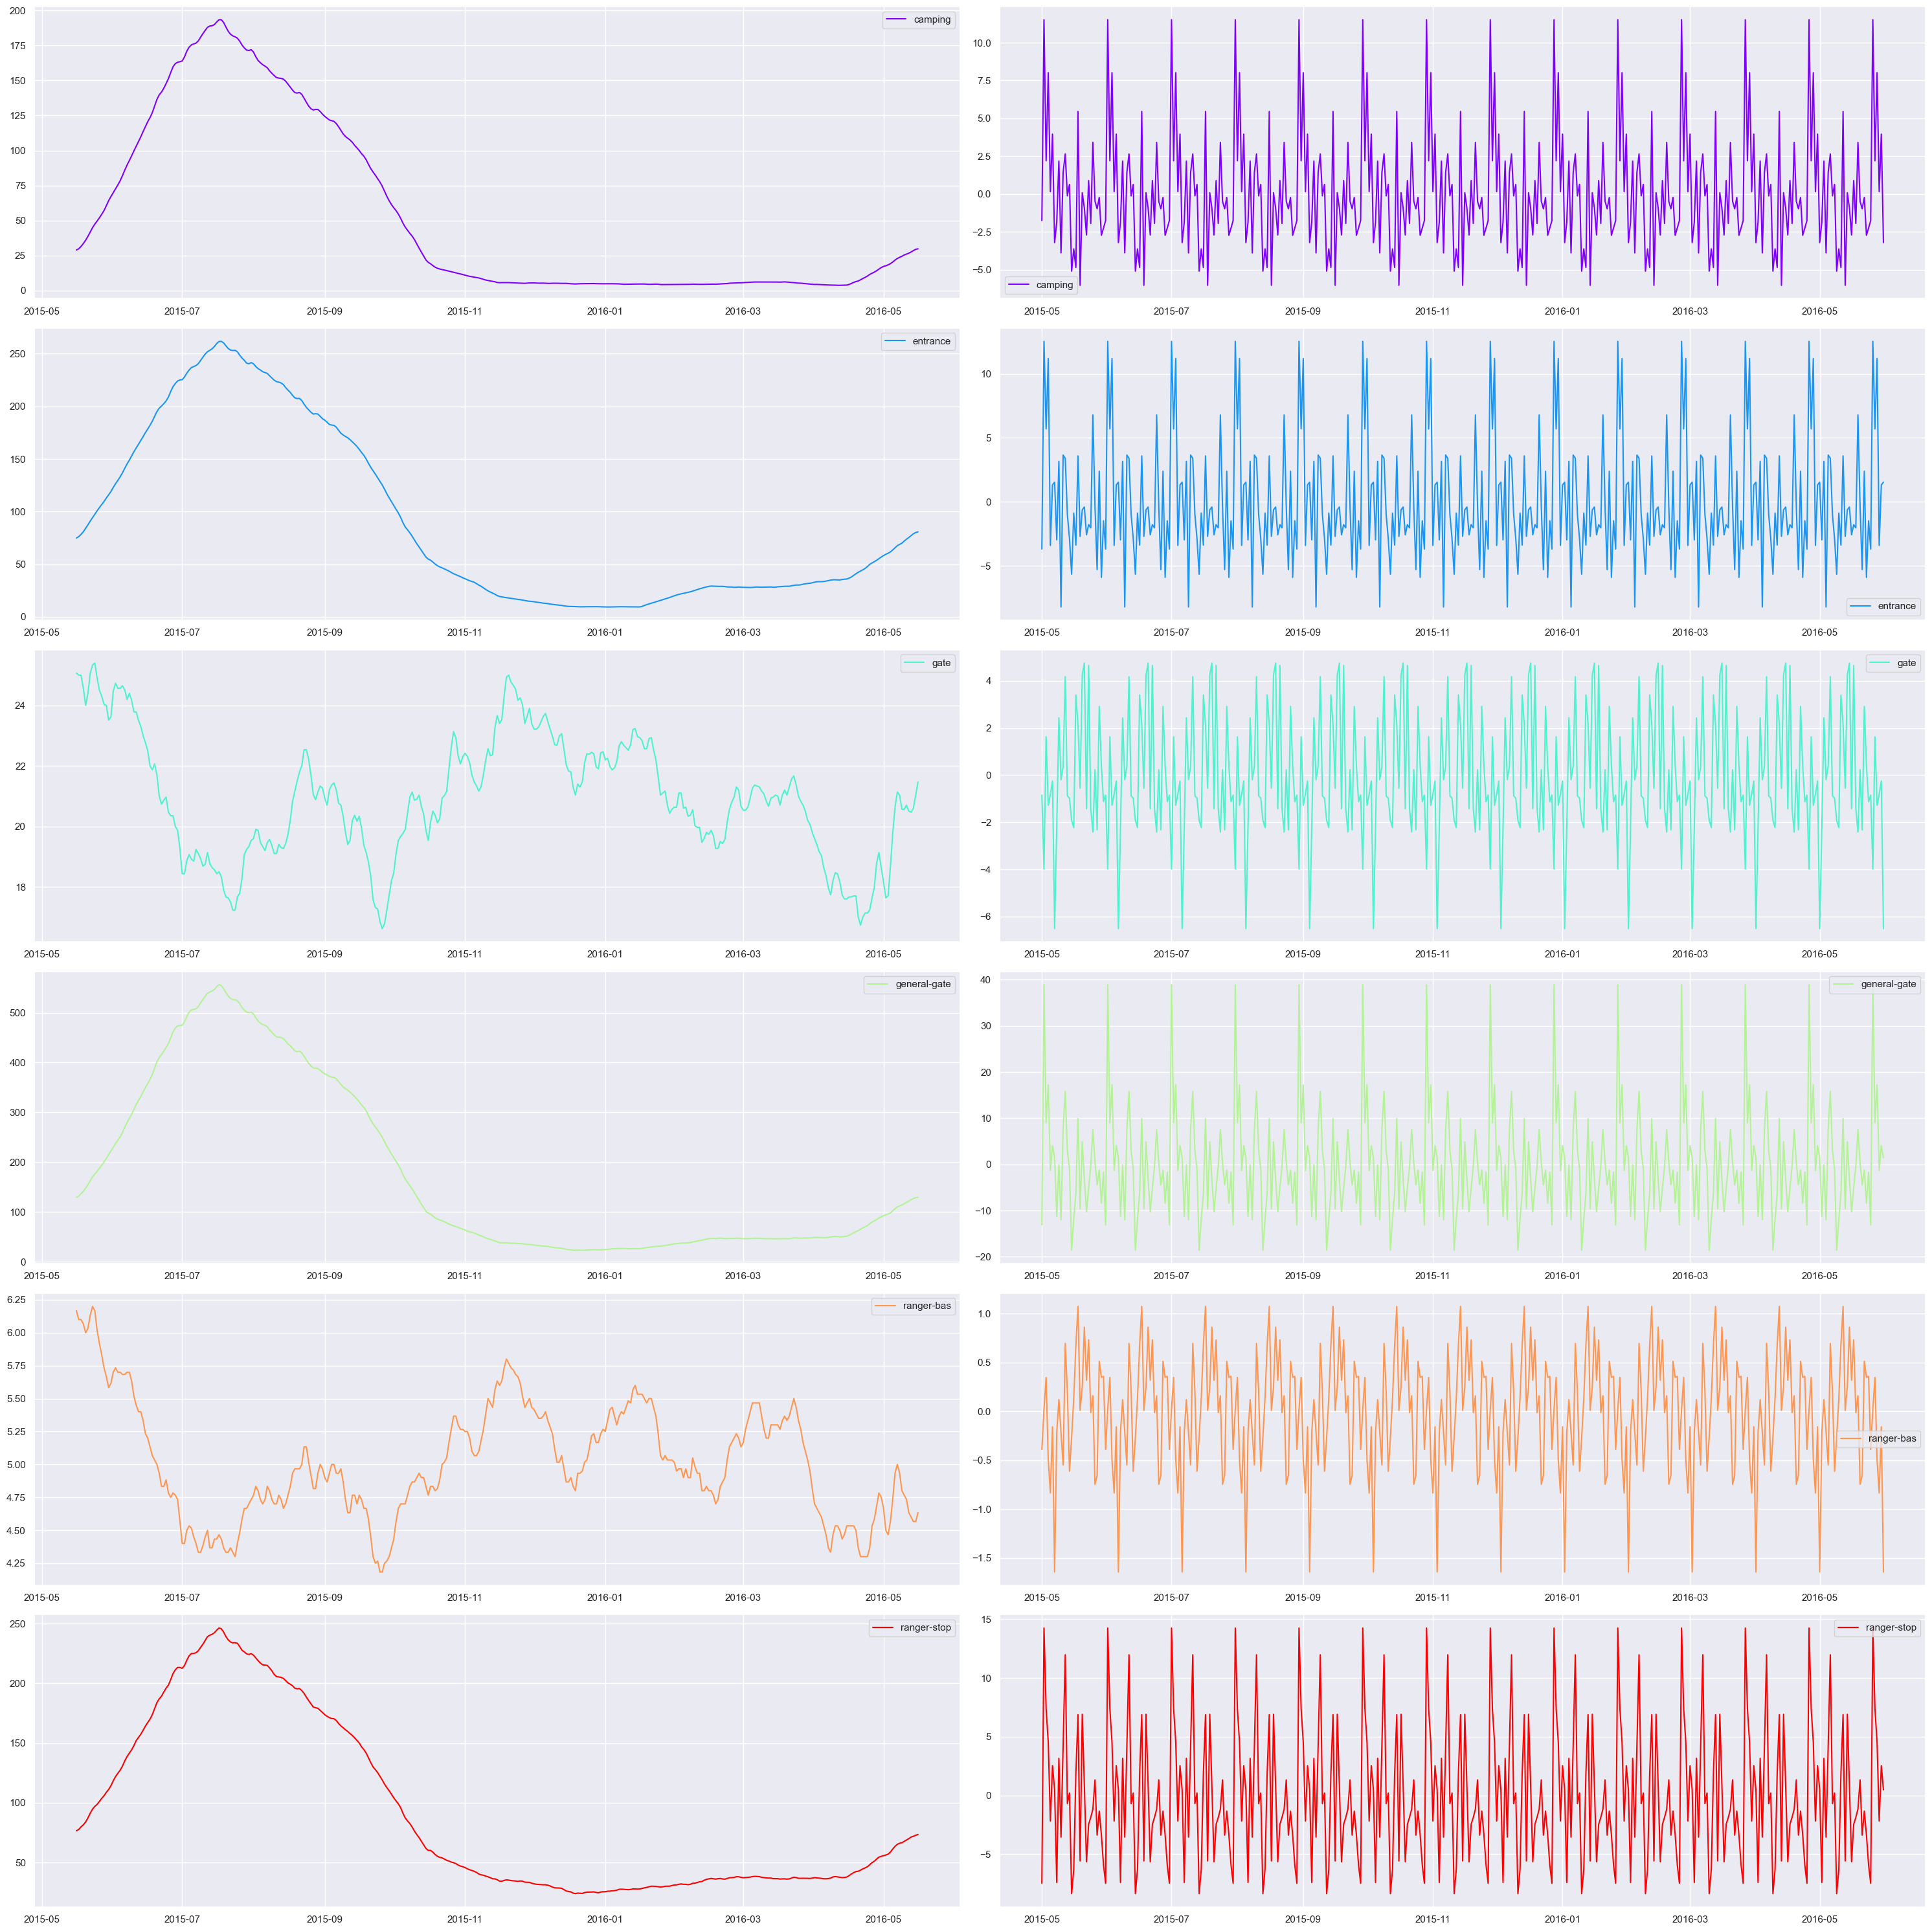

In [58]:
fig,axes = plt.subplots(6,2,figsize=(30,30))
colors = cm.rainbow(np.linspace(0, 1, 6))
gatetypes = np.unique(df['gate_category'])
for ax, gatetype,color in zip(axes,gatetypes,colors):
    by_date = df[df['gate_category']==gatetype].groupby([df[df['gate_category']==gatetype].index.date])[['count']].sum()
    result = seasonal_decompose(by_date["count"], model='additive',period=30)
    ax[0].plot(result.trend,label=gatetype,color=color)
    ax[1].plot(result.seasonal,label=gatetype,color=color)
    ax[0].legend()
    ax[1].legend()
fig.tight_layout()
plt.show()

# Change Point Detection

In [60]:
from changeforest import changeforest

In [152]:
def sample_by_week(X,chunk_size=7):
    remainder = len(X) % chunk_size
    if remainder != 0:
        X = np.pad(X, (0, chunk_size - remainder), mode='constant', constant_values=X[-1])
    result = X.reshape(-1, chunk_size)
    
    return result

## For Each Car Type

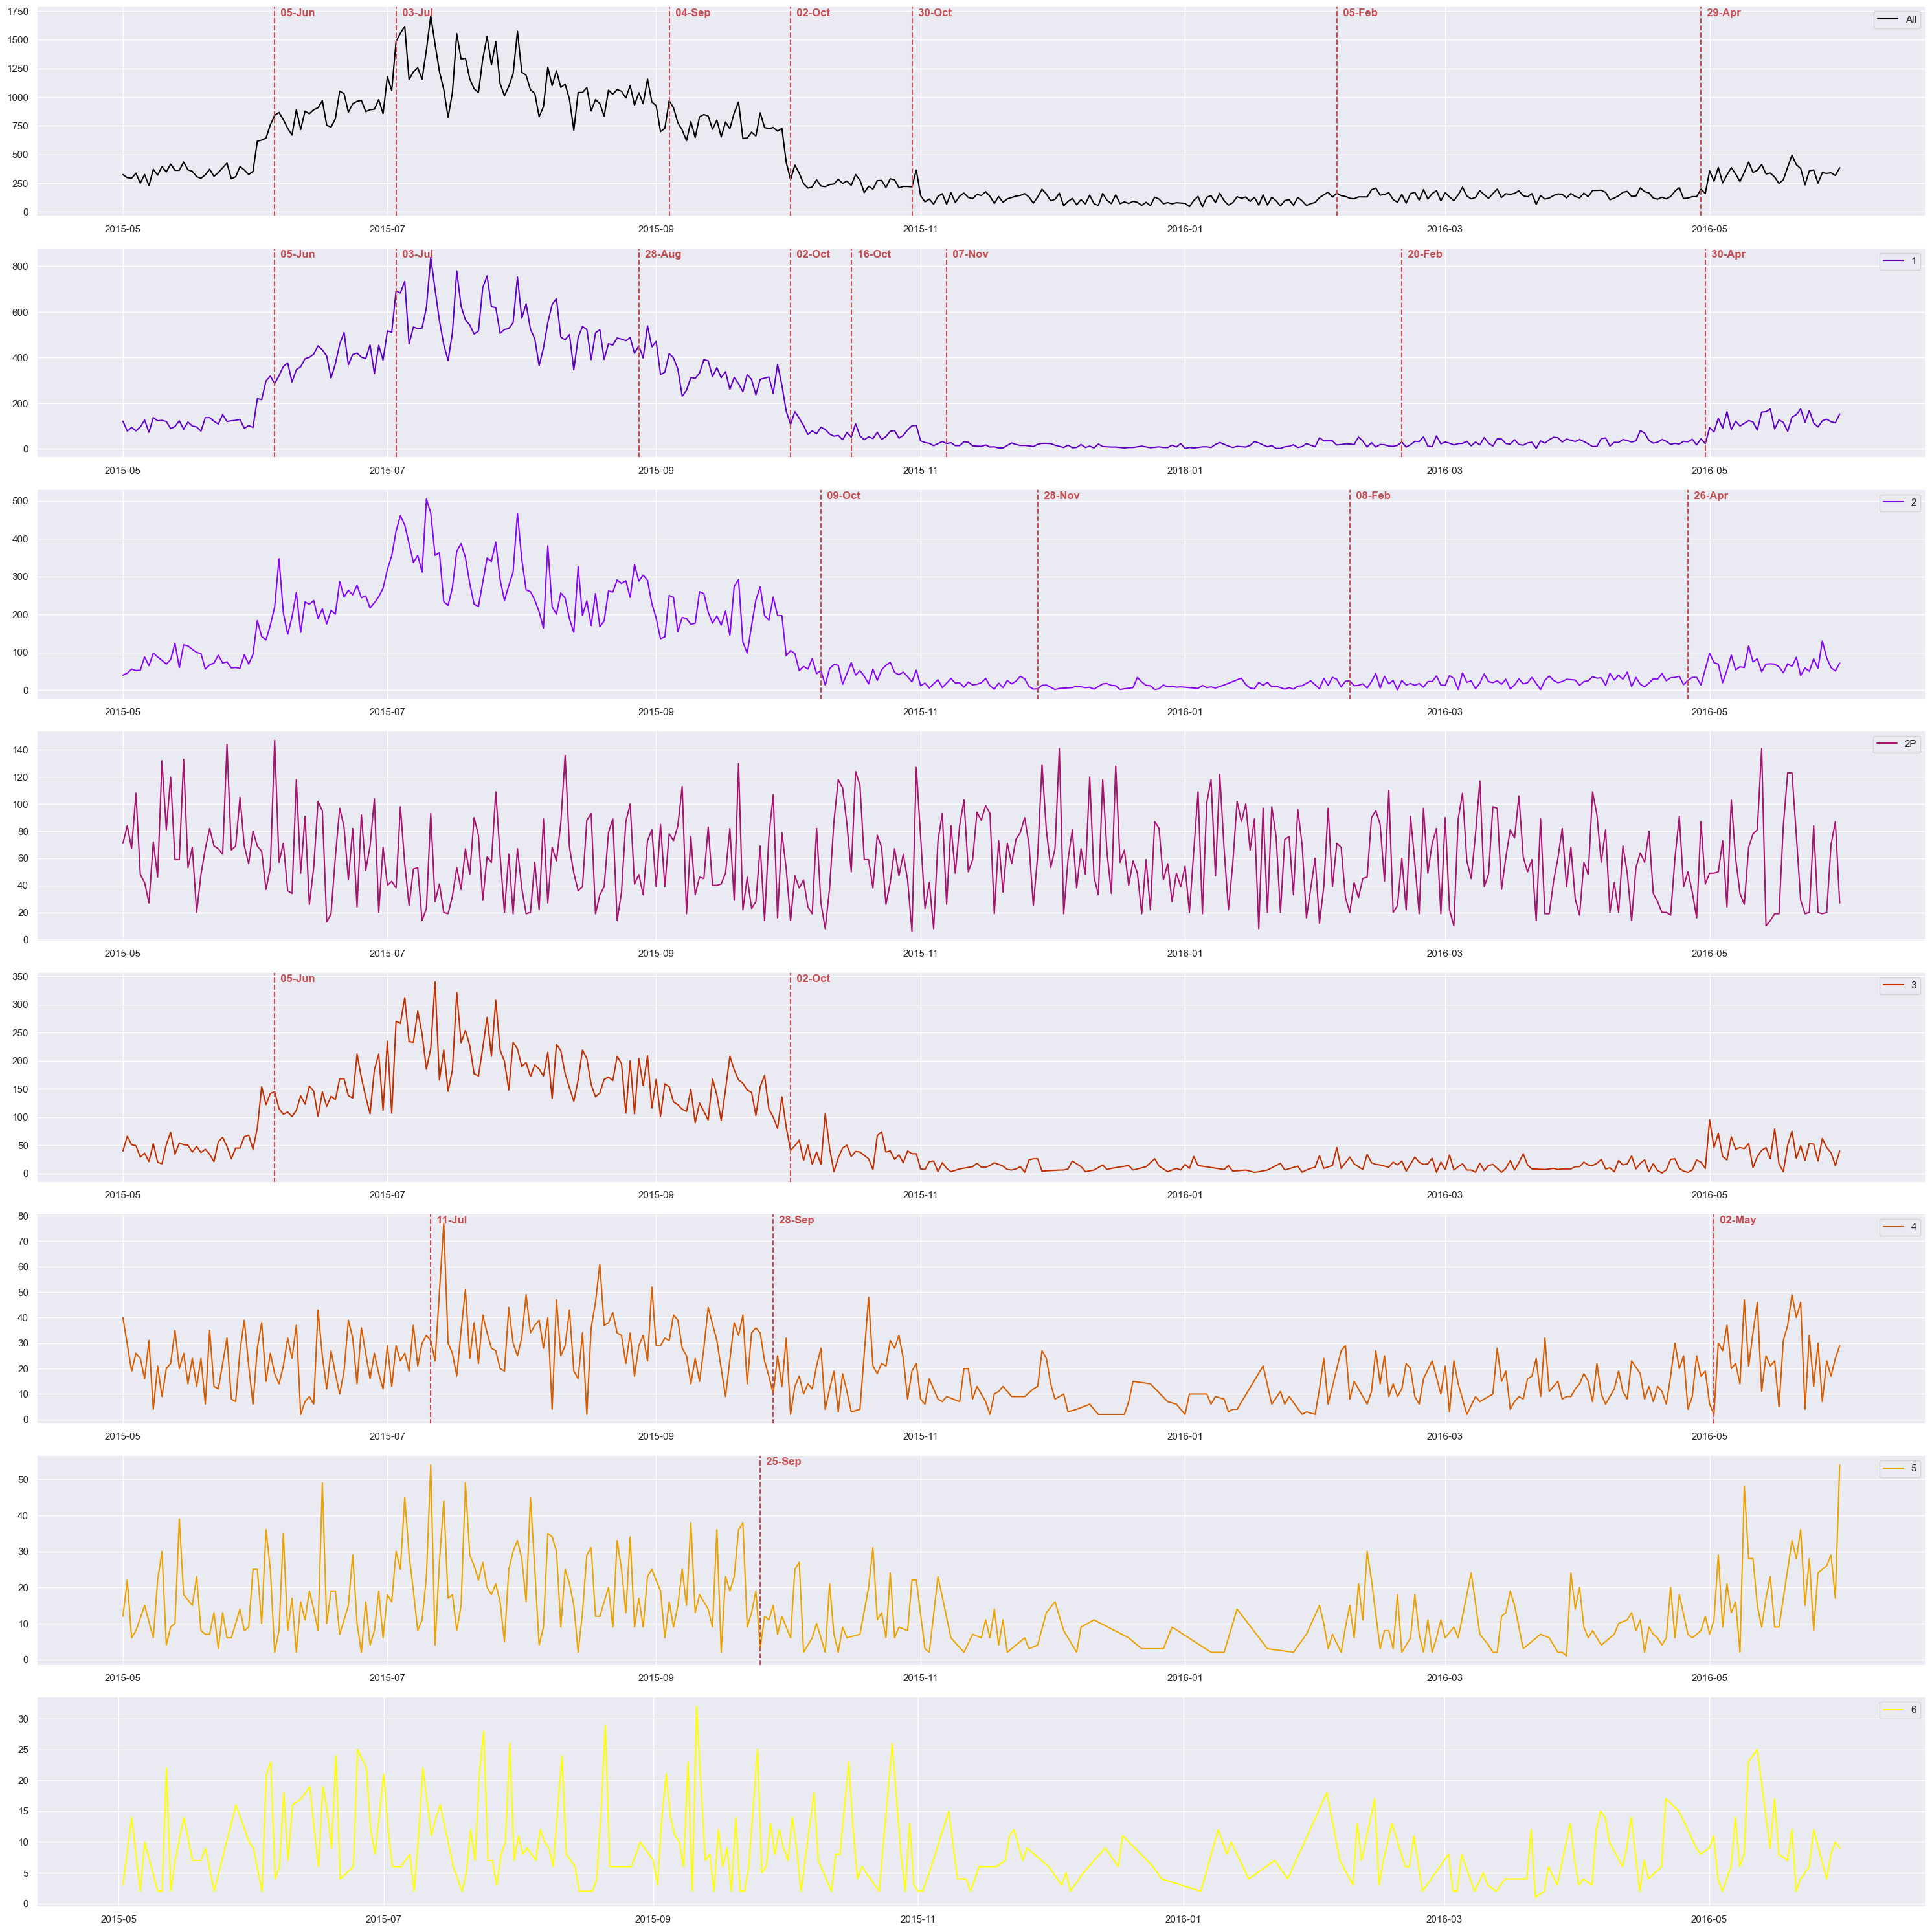

In [197]:
fig,axes = plt.subplots(8,1,figsize=(30,30))
colors = cm.gnuplot(np.linspace(0, 1, 8))
by_date = df.groupby([df.index.date])[['count']].sum()
y_max = max(np.array(by_date))[0]
X = sample_by_week(np.array(by_date['count']))
result = changeforest(X,"random_forest", "bs")
change_points = []
for i in result.split_points():
    change_points.append(by_date.index[i*7])
axes[0].plot(by_date,label="All",color=colors[0])
for change_point in change_points:
    axes[0].axvline(x=change_point, color='r', linestyle='--')
    axes[0].text(change_point,y_max,"  "+change_point.strftime('%d-%b'),color='r',fontweight='bold') 
axes[0].legend()

cartypes = np.unique(df['car-type'])
for ax, cartype,color in zip(axes[1:],cartypes,colors[1:]):
    by_date = df[df['car-type']==cartype].groupby([df[df['car-type']==cartype].index.date])[['count']].sum()
    y_max = max(np.array(by_date))[0]
    X = sample_by_week(np.array(by_date['count']))
    result = changeforest(X,"random_forest", "bs")
    change_points = []
    for i in result.split_points():
        change_points.append(by_date.index[i*7])
    ax.plot(by_date,label=cartype,color=color)
    for change_point in change_points:
        ax.axvline(x=change_point, color='r', linestyle='--')
        ax.text(change_point,y_max,"  "+change_point.strftime('%d-%b'),color='r',fontweight='bold')
    ax.legend()

fig.tight_layout()
plt.show()



## For Each Gate Type 

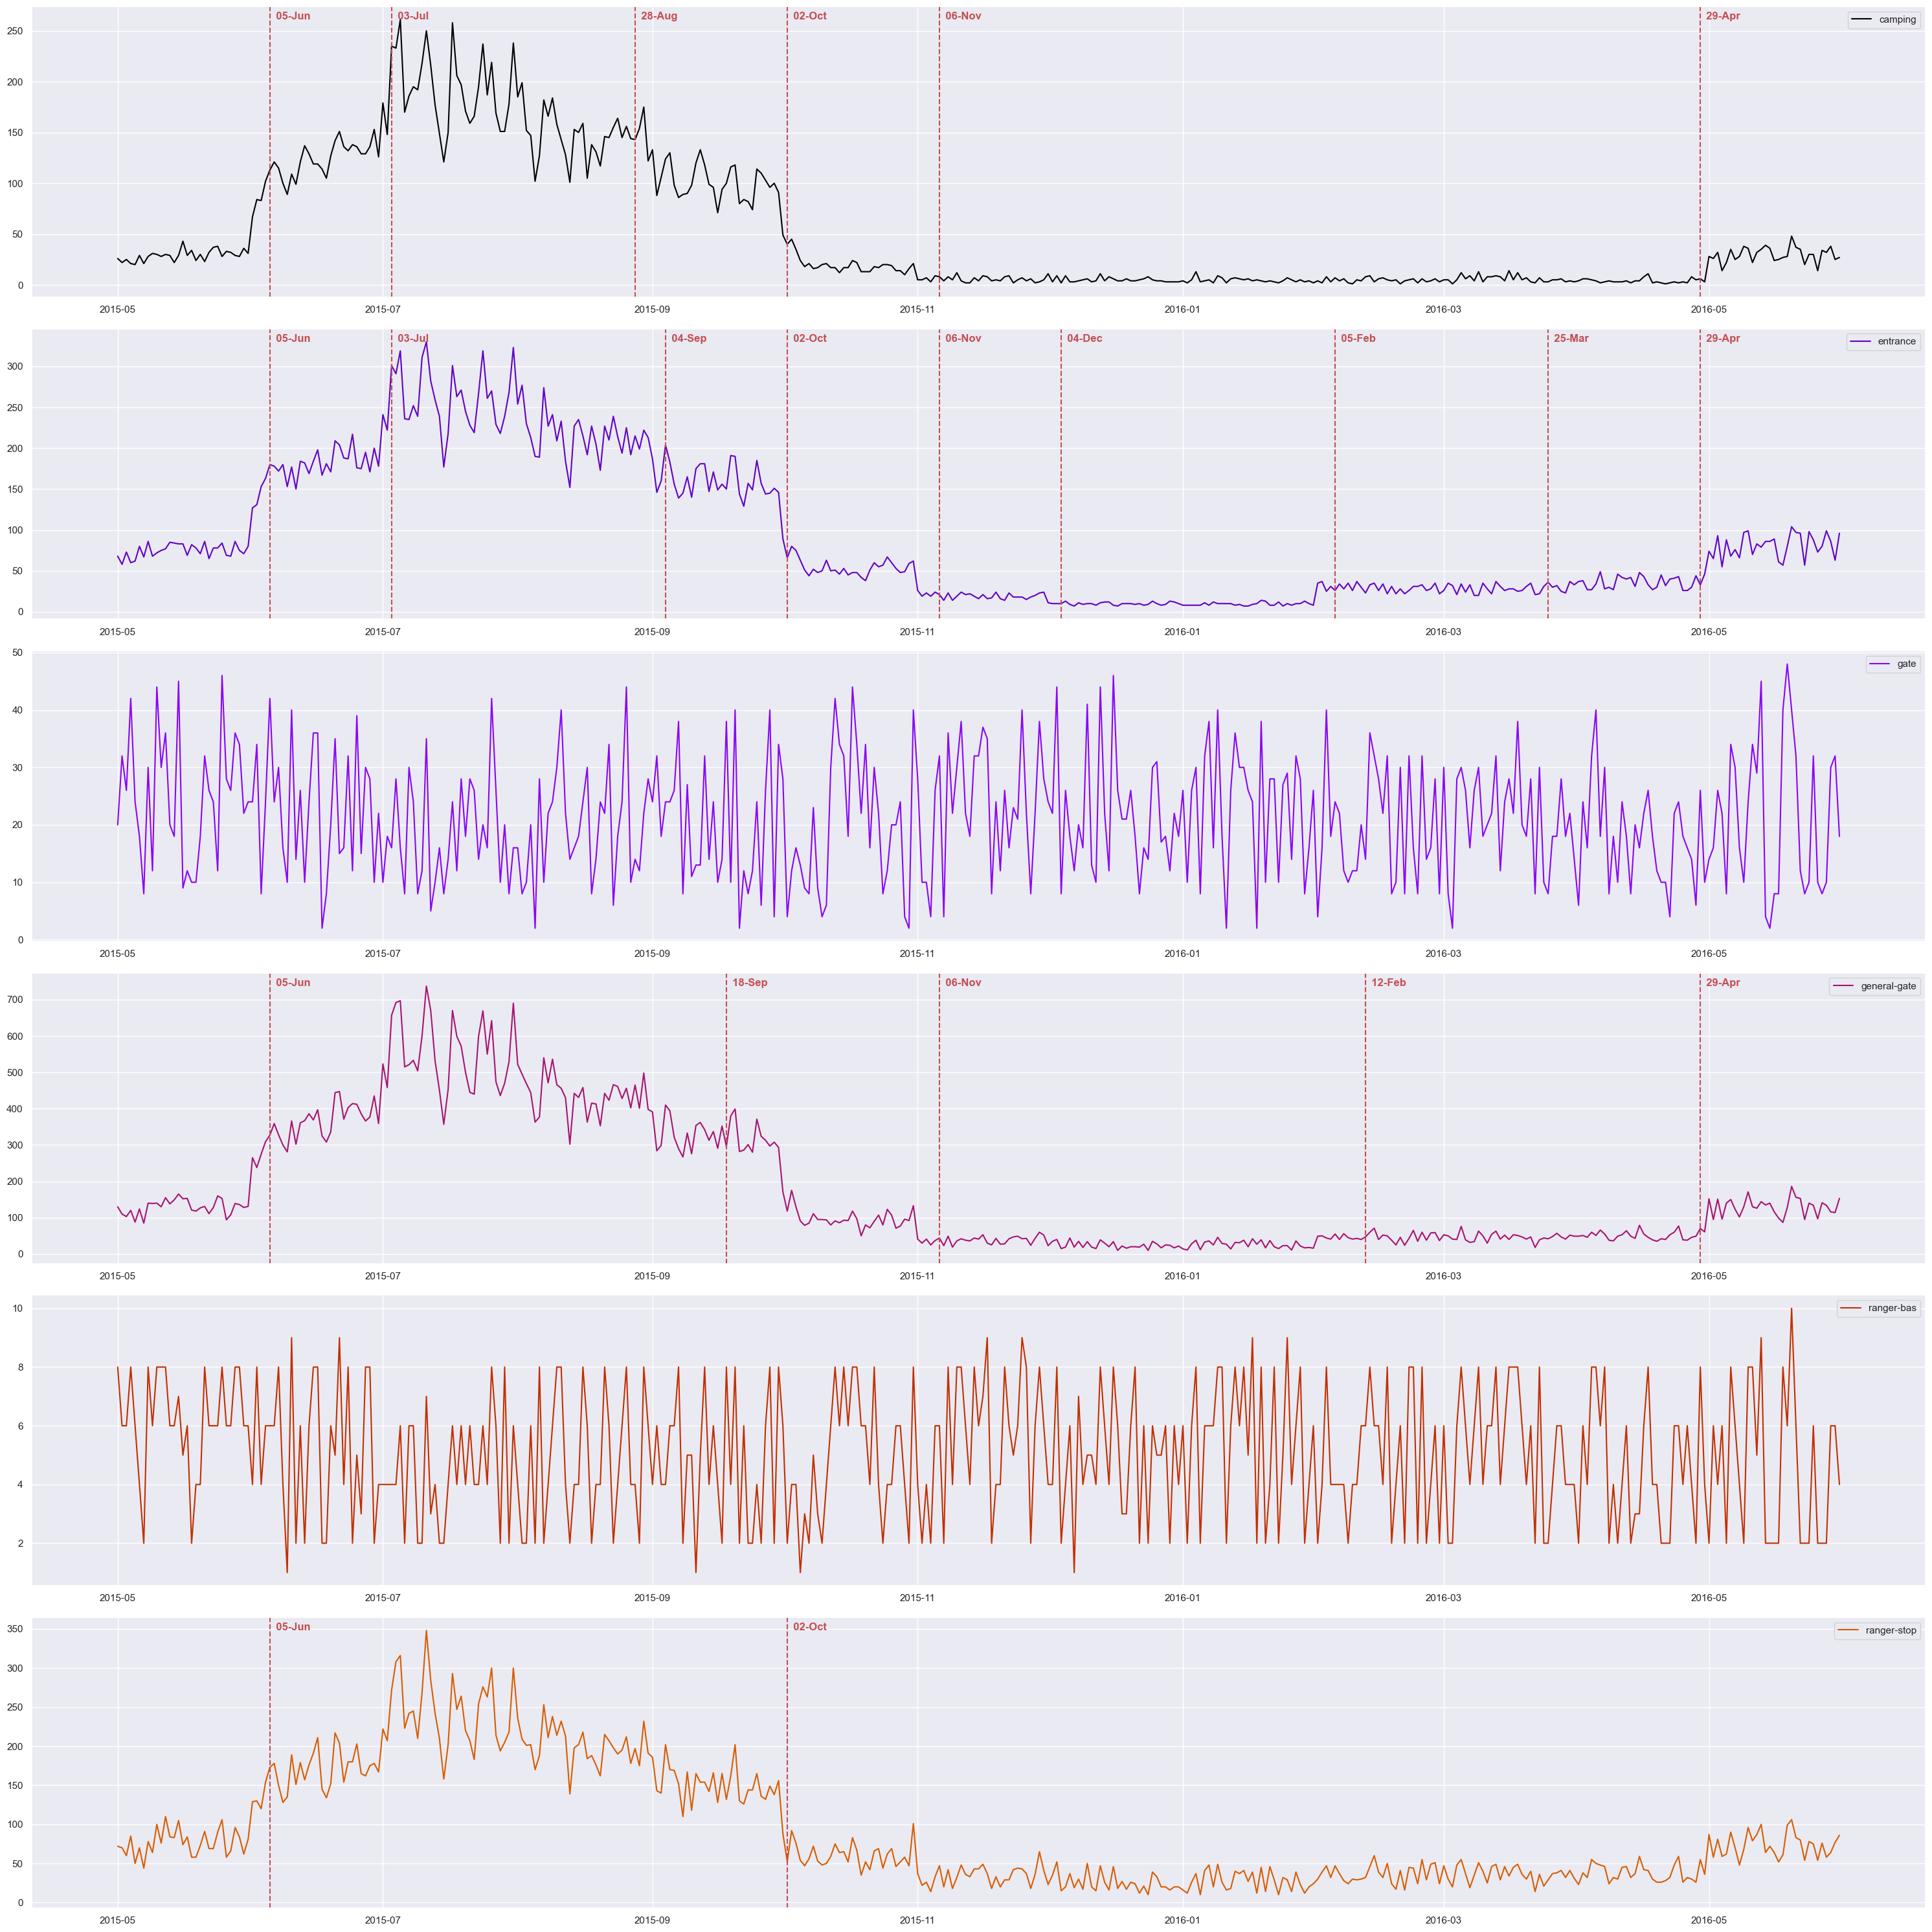

In [199]:
fig,axes = plt.subplots(6,1,figsize=(30,30))
colors = cm.gnuplot(np.linspace(0, 1, 8))
gateypes = np.unique(df['gate_category'])
for ax, gatetype,color in zip(axes,gatetypes,colors):
    by_date = df[df['gate_category']==gatetype].groupby([df[df['gate_category']==gatetype].index.date])[['count']].sum()
    y_max = max(np.array(by_date))[0]
    X = sample_by_week(np.array(by_date['count']))
    result = changeforest(X,"random_forest", "bs")
    change_points = []
    for i in result.split_points():
        change_points.append(by_date.index[i*7])
    ax.plot(by_date,label=gatetype,color=color)
    for change_point in change_points:
        ax.axvline(x=change_point, color="r", linestyle='--')
        ax.text(change_point,y_max,"  "+change_point.strftime('%d-%b'),color='r',fontweight='bold')
    ax.legend()

fig.tight_layout()
plt.show()


# new